# Lab 4 – Doing regression.
Here is what we will do:
1. Prepare the data
2. Train and analyze a linear regression
- single input feature
- multiple input features
3. Train and analyze a polynomial regression
4. Train and analyze a regularized model

### Prepare the data

In [1]:
# third cell -
import pandas as pd
howell_full = pd.read_csv("Howell.csv", sep=";")

# Compute bmi based on height and weight metric units
def bmi(height, weight):
    return 10000*weight/(height**2)


new_feature = bmi(howell_full['height'], howell_full['weight'])

howell_full['bmi'] = new_feature
howell_full.head(n=10)

import numpy as np

def bmi_category(bmi):
    # bmi can only be a single value
    if bmi < 18.5: return 'Underweight'
    if bmi < 25.0: return 'Normal'
    if bmi < 30.0: return 'Overweight'
    return 'Obese'

vector_bmi_category = np.vectorize(bmi_category)
howell_full['bmi class'] = vector_bmi_category(howell_full['bmi'])
howell_full['bmi class'].value_counts()


Underweight    341
Normal         202
Overweight       1
Name: bmi class, dtype: int64

### A Better Plot

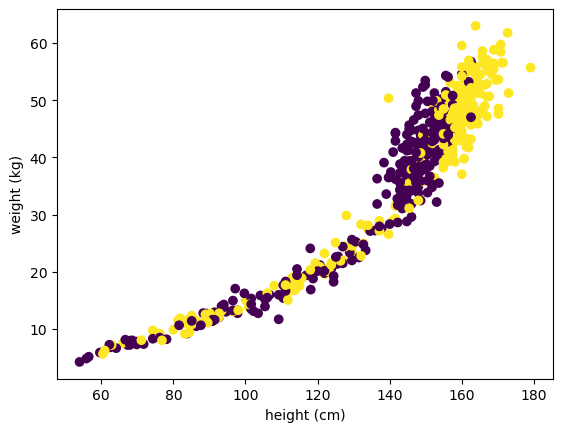

In [2]:
import matplotlib.pyplot as plt
height = howell_full['height']
weight = howell_full['weight']
## plt.scatter(height, weight)
## plt.xlabel('height (cm)')
## plt.ylabel('weight (kg)')
## plt.show()

gender = howell_full['male']
plt.scatter(height, weight, c=gender)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.show()

age = howell_full['age']
## plt.scatter(age, height, c=gender)
## plt.xlabel('age (years)')
## plt.ylabel('height (cm)')
## plt.show()




### Train/Test Data Split

In [3]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(howell_full, 
                        test_size=0.2, random_state=123)
print('Train size: ', len(train_set), 'Test size: ', len(test_set))






Train size:  435 Test size:  109


### Train and evaluate a Linear Regression Model

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = train_set[['height']]
y = train_set['weight']
X_test = test_set[['height']]
y_test = test_set['weight']

lr_model = LinearRegression()
lr_model.fit(X,y)

y_pred = lr_model.predict(X)
print('Results for linear regression on training data')
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))

y_test_pred = lr_model.predict(X_test)
print()
print('Results for linear regression on test data')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))


Results for linear regression on training data
 Default settings
Internal parameters:
 Bias is  -34.33484184267892
 Coefficients [0.50625269]
 Score 0.8892970528522413
MAE is  3.986801374333733
RMSE is  4.901419255121661
MSE is  24.02391071447738
R^2  0.8892970528522413

Results for linear regression on test data
MAE is  4.268058841968444
RMSE is  5.308233145876227
MSE is  28.177339130979025
R^2  0.8677460846087206


### Plot linear regression model
Using height to predict weight 

C:\Users\naiem\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


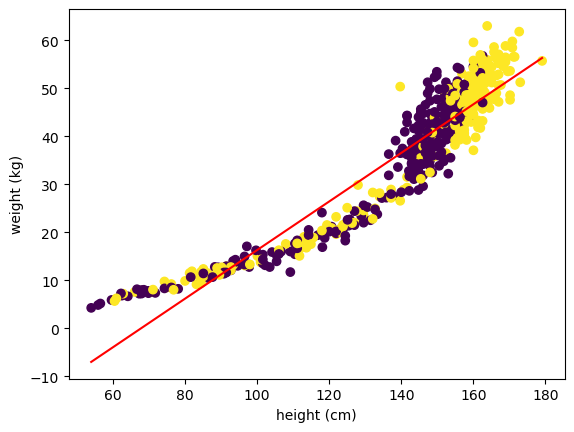

In [5]:
import matplotlib.pyplot as plt

height = howell_full['height']
weight = howell_full['weight']
min_height = height.min()
max_height = height.max()
points = 200
step_by = (max_height - min_height)/(points-1)



x_values = [min_height + i*step_by for i in range(0, points)]
inputs = [[x] for x in x_values]
y_values = lr_model.predict(inputs)
gender = howell_full['male']
plt.scatter(height, weight, c=gender)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.plot(x_values, y_values, c='red')
plt.show()





### Add a Feature to the Model

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = train_set[['height', 'age']]
y = train_set['weight']
X_test = test_set[['height', 'age']]
y_test = test_set['weight']

lr_model = LinearRegression()
lr_model.fit(X,y)

y_pred = lr_model.predict(X)
print('Results for linear regression on training data')
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))

y_test_pred = lr_model.predict(X_test)
print()
print('Results for linear regression on test data')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))

print('Results for linear regression on training data')
print('Input: Height, age')
print('Results for linear regression on test data')
print('Input: Height, age')

Results for linear regression on training data
 Default settings
Internal parameters:
 Bias is  -32.981786351678274
 Coefficients [0.48959129 0.03198353]
 Score 0.8903963296817052
MAE is  3.9844579179380504
RMSE is  4.877023070139708
MSE is  23.78535402667494
R^2  0.8903963296817052

Results for linear regression on test data
MAE is  4.1967168519461024
RMSE is  5.1834661256248555
MSE is  26.86832107550035
R^2  0.8738901268956872
Results for linear regression on training data
Input: Height, age
Results for linear regression on test data
Input: Height, age


### Use Polynomial Regression

In [7]:
from sklearn.preprocessing import PolynomialFeatures
power = 3
poly_process = PolynomialFeatures(degree=power, include_bias=False)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = train_set[['height']]
y = train_set['weight']
X_poly = poly_process.fit_transform(X)
X_test = test_set[['height']]
y_test = test_set['weight']
X_poly_test = poly_process.fit_transform(X_test)

lr_model = LinearRegression()
lr_model.fit(X_poly,y)

y_pred = lr_model.predict(X_poly)
print('Results for linear regression on training data')
print('Polynomial regression with degree ', power)
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X_poly,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))

y_test_pred = lr_model.predict(X_poly_test)
print()
print('Results for linear regression on test data')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))


Results for linear regression on training data
Polynomial regression with degree  3
 Default settings
Internal parameters:
 Bias is  38.75567249133163
 Coefficients [-9.68874202e-01  8.36011255e-03 -1.20345929e-05]
 Score 0.9327619061923518
MAE is  2.9208443646671536
RMSE is  3.819882089468077
MSE is  14.591499177439005
R^2  0.9327619061923518

Results for linear regression on test data
MAE is  3.292941894856225
RMSE is  4.305579019074092
MSE is  18.53801068949102
R^2  0.9129894953581661


### Polynomial Regress Graph

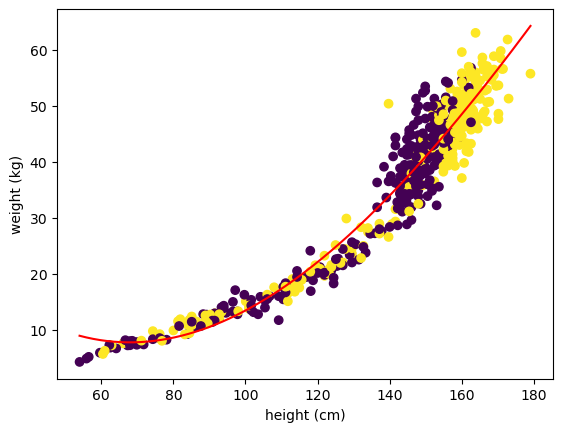

In [8]:
import matplotlib.pyplot as plt

height = howell_full['height']
weight = howell_full['weight']
min_height = height.min()
max_height = height.max()
points = 200
step_by = (max_height - min_height)/(points-1)



x_values = [min_height + i*step_by for i in range(0, points)]
inputs = [[x] for x in x_values]
inputs_poly = poly_process.fit_transform(inputs)
y_values = lr_model.predict(inputs_poly)
gender = howell_full['male']
plt.scatter(height, weight, c=gender)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.plot(x_values, y_values, c='red')
plt.show()

## Try a higher degree

In [9]:
from sklearn.preprocessing import PolynomialFeatures
power = 8
poly_process = PolynomialFeatures(degree=power, include_bias=False)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = train_set[['height']]
y = train_set['weight']
X_poly = poly_process.fit_transform(X)
X_test = test_set[['height']]
y_test = test_set['weight']
X_poly_test = poly_process.fit_transform(X_test)

lr_model = LinearRegression()
lr_model.fit(X_poly,y)

y_pred = lr_model.predict(X_poly)
print('Results for linear regression on training data')
print('Polynomial regression with degree ', power)
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X_poly,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))

y_test_pred = lr_model.predict(X_poly_test)
print()
print('Results for linear regression on test data')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))


Results for linear regression on training data
Polynomial regression with degree  8
 Default settings
Internal parameters:
 Bias is  30.62879051239215
 Coefficients [-1.05795333e-06 -6.41645118e-05 -1.70103321e-03  6.23554639e-05
 -9.32701025e-07  7.00868753e-09 -2.62025483e-11  3.88203504e-14]
 Score 0.9379323651742737
MAE is  2.6922585184522307
RMSE is  3.6700743229908213
MSE is  13.469445536276535
R^2  0.9379323651742737

Results for linear regression on test data
MAE is  3.1025602041226703
RMSE is  4.257600279688652
MSE is  18.127160141604886
R^2  0.9149178745193784


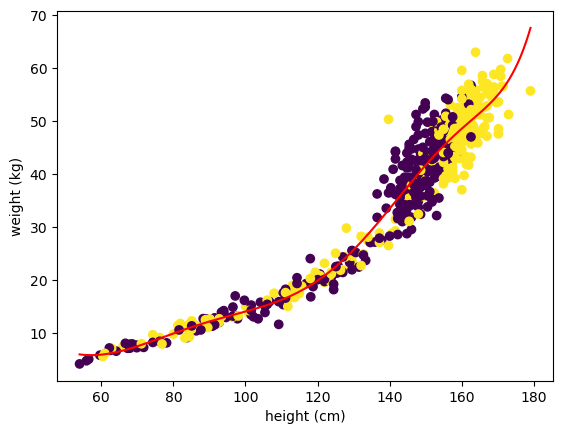

In [10]:
import matplotlib.pyplot as plt

height = howell_full['height']
weight = howell_full['weight']
min_height = height.min()
max_height = height.max()
points = 200
step_by = (max_height - min_height)/(points-1)



x_values = [min_height + i*step_by for i in range(0, points)]
inputs = [[x] for x in x_values]
inputs_poly = poly_process.fit_transform(inputs)
y_values = lr_model.predict(inputs_poly)
gender = howell_full['male']
plt.scatter(height, weight, c=gender)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.plot(x_values, y_values, c='red')
plt.show()

### Elastic Net with Poly Features

In [11]:
from sklearn.linear_model import ElasticNet

from sklearn.preprocessing import PolynomialFeatures
power = 8
poly_process = PolynomialFeatures(degree=power, include_bias=False)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = train_set[['height']]
y = train_set['weight']
X_poly = poly_process.fit_transform(X)
X_test = test_set[['height']]
y_test = test_set['weight']
X_poly_test = poly_process.fit_transform(X_test)

reg_lr_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
reg_lr_model.fit(X_poly,y)

y_pred = reg_lr_model.predict(X_poly)
print('Results for elastic net on training data')
print('Polynomial regression with degree ', power)
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', reg_lr_model.intercept_)
print(' Coefficients', reg_lr_model.coef_)
print(' Score', reg_lr_model.score(X_poly,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))

y_test_pred = reg_lr_model.predict(X_poly_test)
print()
print( 'Results for elastic net on test data')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))


Results for elastic net on training data
Polynomial regression with degree  8
 Default settings
Internal parameters:
 Bias is  18.846113403922274
 Coefficients [-2.55756771e-01  6.87204298e-04  8.52528900e-06  3.67563933e-08
  1.17760939e-10  1.01431642e-13 -2.55533600e-15 -3.04757085e-17]
 Score 0.9349092303329695
MAE is  2.8731176934054683
RMSE is  3.758391044295953
MSE is  14.125503241844024
R^2  0.9349092303329695

Results for elastic net on test data
MAE is  3.22521871336981
RMSE is  4.216395062227051
MSE is  17.77798732077266
R^2  0.9165567614450963


C:\Users\naiem\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.091e+03, tolerance: 9.440e+00
  model = cd_fast.enet_coordinate_descent(


### Elastic Net Graph

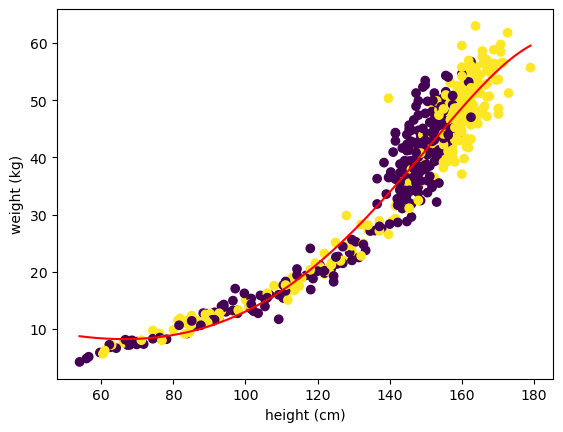

In [12]:
import matplotlib.pyplot as plt

height = howell_full['height']
weight = howell_full['weight']
min_height = height.min()
max_height = height.max()
points = 200
step_by = (max_height - min_height)/(points-1)



x_values = [min_height + i*step_by for i in range(0, points)]
inputs = [[x] for x in x_values]
inputs_poly = poly_process.fit_transform(inputs)
y_values =  reg_lr_model.predict(inputs_poly)
gender = howell_full['male']
plt.scatter(height, weight, c=gender)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.plot(x_values, y_values, c='red')
plt.show()

# Results
Basic results for our regression models to predict weight on
the Howell data.
| Model | Training Features | Set | RMSE | R2 |
|:---|:---|:---|:---|:---|
|Linear Regression|Height|Training|4.90|88.93|
|Linear Regression|Height|Test|4.27|86.77|
|Linear Regression|Height,Age|Training|4.88|89.04|
|Linear Regression|Height,Age|Test|5.18|87.39|
|Polynomial Regression degree 3|Height|Training|3.82|83.28|
|Polynomial Regression degree 3|Height|Test|4.31|91.30|
|Polynomial Regression degree 8|Height|Training|3.67|93.79|
|Polynomial Regression degree 8|Height|Test|4.26|91.50|
|Elastic Net degree 8|Height|Training|3.76|93.49|
|Elastic Net degree 8|Height|Test|4.22|91.66|
|Linear Regression|Weight|Test|4.27|86.77|